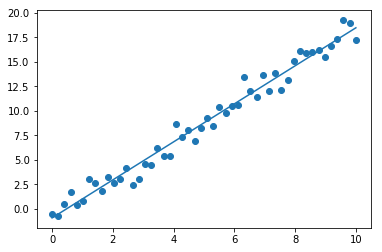

[1.9420166]
-0.9355569077970234


In [2]:
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt 
import numpy as np 
rng = np.random.RandomState(42) 
x = np.linspace(0,10,50) 
y = 2 * x - 1 + rng.randn(50) #正态分布均值为0 方差为1的50个 点
model = LinearRegression()#fit_intercept=True 
model.fit(x.reshape(x.size,1),y) #需要二维数据， 
xfit=np.linspace(0,10,1000) 
yfit=model.predict(xfit.reshape(xfit.size,1)) 
plt.scatter(x,y) 
plt.plot(xfit,yfit) 
plt.show() 
print(model.coef_) #斜率 [2.00162915] 
print(model.intercept_) #截距-1.0655711700789823

### pizza(经典线性）

In [5]:
from sklearn.linear_model import LinearRegression #数据集 直径、价格 
x = [[5],[6],[7],[8],[10],[11],[13],[14],[16],[18]] 
y = [6,7.5,8.6,9,12,13.6,15.8,18.5,19.2,20] 
clf = LinearRegression() 
clf.fit(x,y) 
pre = clf.predict([[12]]) 
print("The price of 12 is {}".format(pre))

The price of 12 is [14.41797235]


### 多项式回归

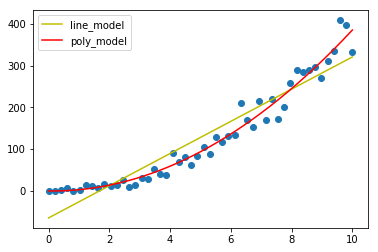

In [6]:
import matplotlib.pyplot as plt 
import numpy as np
rng = np.random.RandomState(42) 
x = np.linspace(0,10,50) 
y = (2 * x + rng.randn(50))**2-1 
x=x.reshape(x.size,1) 
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(x,y) #需要二维数据， 
xfit=np.linspace(0,10,1000).reshape(1000,1) 
yfit=model.predict(xfit) 
plt.scatter(x,y) 
plt.plot(xfit,yfit,color='y',label='line_model') 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import make_pipeline 
poly_model = make_pipeline(PolynomialFeatures(2), LinearRegression()) 
poly_model.fit(x,y) #二次多项式训练 
y_pre=poly_model.predict(xfit) 
plt.plot(xfit,y_pre,color='r',label='poly_model') 
plt.legend() 
plt.show()

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.modlel_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score
from sklearn import linear_model
from sklearn import datasets
diabetes = datasets.load_diabetes() #载入糖尿病数据
X=diabetes.data
Y=diabetes.target
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,random_state=2)
#回归训练及预测
clf = linear_model.LinearRegression()
clf.fit(xtrain,ytrain) #注: 训练数据集
y_pre=clf.predict(xtest)
print('Coefficients :\n',clf.coef_)#斜率 clf.intercept_ #截距
print("variance score: %.2f" % clf.score(xtest, ytest)) #评分函数
plt.plot(range(len(y_pre)),y_pre,color='blue',marker='x',label="predict")
plt.plot(range(len(ytest)),ytest,color='red',marker='o',label="test")

ModuleNotFoundError: No module named 'sklearn.modlelselection'

0.5695333747531193
0.6640060829554197


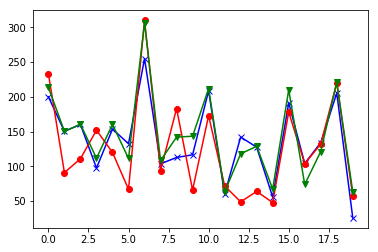

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import datasets
from sklearn import linear_model
poly_model = make_pipeline(PolynomialFeatures(2), LinearRegression())
diabetes = datasets.load_diabetes()
Y=diabetes.target
X=diabetes.data[:,0:7] #取6个特征
xtrain =X[:-20,:] #训练样本
xtest = X[-20:,:] #测试样本 后20行
ytrain = Y[:-20] #训练标记
ytest = Y[-20:] #预测对比标记 手动标记样本
poly_model.fit(xtrain, ytrain)#二次多项式训练
clf = linear_model.LinearRegression()
clf.fit(xtrain,ytrain) #注: 训练数据集
y_pre=clf.predict(xtest)
y_pre_n=poly_model.predict(xtest)
print(clf.score(xtest, ytest)) #评分函数
print(poly_model.score(xtest, ytest)) #评分函数
plt.plot(range(len(y_pre)),y_pre,color='blue',marker='x',label="pre_line")
plt.plot(range(len(ytest)),ytest,color='red',marker='o',label="test")
plt.plot(range(len(y_pre_n)),y_pre_n,color='green',marker='v',label="pre_poly")